In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('yahoof.csv')

In [3]:
df.head()

,Symbol,Name,Price,Change,market cap,PE_ratio
0,BRK-B,Berkshire Hathaway Inc.,321.26,-1.38,709.361B,NaN
1,V,Visa Inc.,230.76,-0.25,483.304B,30.81
2,JPM,JPMorgan Chase & Co.,133.89,-2.16,392.325B,9.90
3,MA,Mastercard Incorporated,380.21,-3.18,359.338B,37.85
4,JPM-PD,JPMorgan Chase & Co.,24.57,-0.08,326.427B,1.82


In [4]:
df.isna().sum()

Symbol         0
Name           0
Price          0
Change         0
market cap     0
PE_ratio      15
dtype: int64

In [5]:
df.describe()

,Change,PE_ratio
count,1250.000000,1235.000000
mean,0.055432,21.220227
std,1.454323,41.848345
min,-3.180000,0.390000
25%,-0.220000,3.570000
50%,-0.010000,9.080000
75%,0.100000,20.370000
max,8.970000,325.770000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      1250 non-null   object 
 1   Name        1250 non-null   object 
 2   Price       1250 non-null   object 
 3   Change      1250 non-null   float64
 4   market cap  1250 non-null   object 
 5   PE_ratio    1235 non-null   float64
dtypes: float64(2), object(4)
memory usage: 58.7+ KB


In [12]:
df['Price'] = df['Price'].str.replace(',','').astype(float)

In [13]:
df['market cap'] = df['market cap'].str.replace('B','').astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      1250 non-null   object 
 1   Name        1250 non-null   object 
 2   Price       1250 non-null   float64
 3   Change      1250 non-null   float64
 4   market cap  1250 non-null   float64
 5   PE_ratio    1250 non-null   float64
dtypes: float64(4), object(2)
memory usage: 58.7+ KB


In [14]:
df['PE_ratio'].fillna(0,inplace=True)

In [15]:
df.isna().sum()

Symbol        0
Name          0
Price         0
Change        0
market cap    0
PE_ratio      0
dtype: int64

In [16]:
y = df.drop(['Symbol','Name','Price','Change'],axis=1)

In [17]:
from sklearn.cluster import KMeans
all_wss = []
for i in range(1,20):
    model = KMeans(n_clusters=i)
    
    model.fit(y)
    all_wss.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [19]:
print(all_wss)

[7529065.050223063, 3811659.47116943, 2252847.0587190436, 1582216.71279, 1202388.46432941, 857764.2659649246, 633633.8110541096, 516378.3623409272, 406142.46796723816, 303521.00829776423, 234225.77684317436, 190341.33309870225, 158704.31252368362, 129946.05667533884, 107010.72551993775, 100293.10165922555, 83600.34309672979, 76935.13180670657, 66441.88557398821]


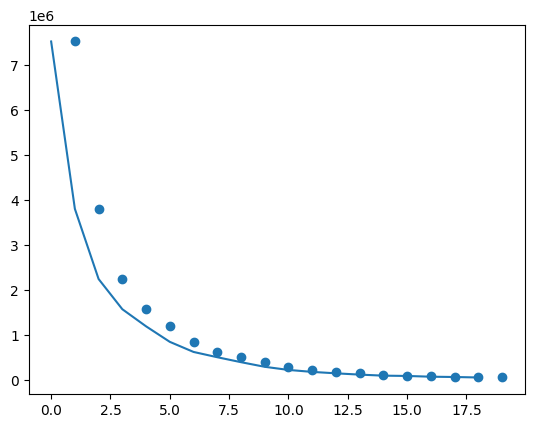

In [20]:
x = np.arange(1,20)
plt.scatter(x,all_wss)
plt.plot(all_wss)

In [43]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6)
model.fit(y)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [44]:
model.labels_

array([4, 4, 4, ..., 0, 0, 0], dtype=int32)

In [45]:
model.cluster_centers_

array([[ 68.42861241,  12.12288276],
       [225.52203521,   5.85570423],
       [125.35496296, 262.51407407],
       [ 89.0478    ,  98.1232    ],
       [375.84304762,  12.52571429],
       [124.03155789,  15.19052632]])

Text(0, 0.5, 'PE_ratio')

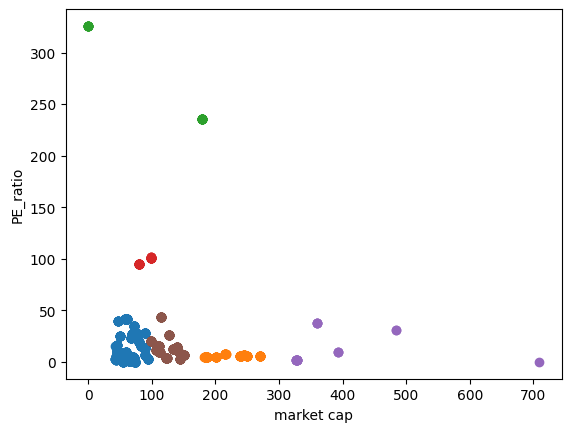

In [48]:
for i in range(6):
    plt.scatter(df['market cap'][model.labels_==i],df['PE_ratio'][model.labels_==i])
plt.xlabel('market cap')
plt.ylabel('PE_ratio')